In [6]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

In [7]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx05y05"
subfix2 = "_aliceseed_elosscorr"
subfix3 = "_r05_05"
subfix4 = "_fixedp0.7"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      


In [8]:
hp0test   = ROOT.TH1D( 'hp0test', 'p0 Residuals Seed', 101, -5, 5 )
hp1test   = ROOT.TH1D( 'hp1test', 'p1 Residuals Seed', 101, -5, 5 )
hp2test   = ROOT.TH1D( 'hp2test', 'p2 Residuals Seed', 101, -5, 5 )
hp3test   = ROOT.TH1D( 'hp3test', 'p3 Residuals Seed', 101, -5, 5 )
hp4test   = ROOT.TH1D( 'hp4test', 'p4 Residuals Seed', 101, -5, 5 )


In [9]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_plane.at(0).Y()
        xMC = t.xyz_plane.at(0).X()
        sinphiMC = t.sinphi_plane.at(0)   
        tanlambdaMC = t.tanlambda_plane.at(0)
        invpTMC = t.invpT_plane.at(0)
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = t.curvature_seed/(0.5*0.00299792458)

        P00 = t.P_seed[0][0]
        P11 = t.P_seed[1][1]
        P22 = t.P_seed[2][2]
        P33 = t.P_seed[3][3]
        P44 = t.P_seed[4][4]
        
        hp0test.Fill((ySeed-yMC)/np.sqrt(P00))
        hp1test.Fill((xSeed-xMC)/np.sqrt(P11))
        hp2test.Fill((sinphiSeed-sinphiMC)/np.sqrt(P22))
        hp3test.Fill((tanlambdaSeed-tanlambdaMC)/np.sqrt(P33))
        hp4test.Fill((invpTSeed-invpTMC)/np.sqrt(P44))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_fixedp0.7/helix_Residp0smearx05y05_aliceseed_elosscorr_r05_05.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_fixedp0.7/helix_Residp1smearx05y05_aliceseed_elosscorr_r05_05.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/kalman/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_fixedp0.7/helix_Residp2smearx05y05_aliceseed_elosscorr_r05_05.png has been created
Warning in <TCanvas::Constru

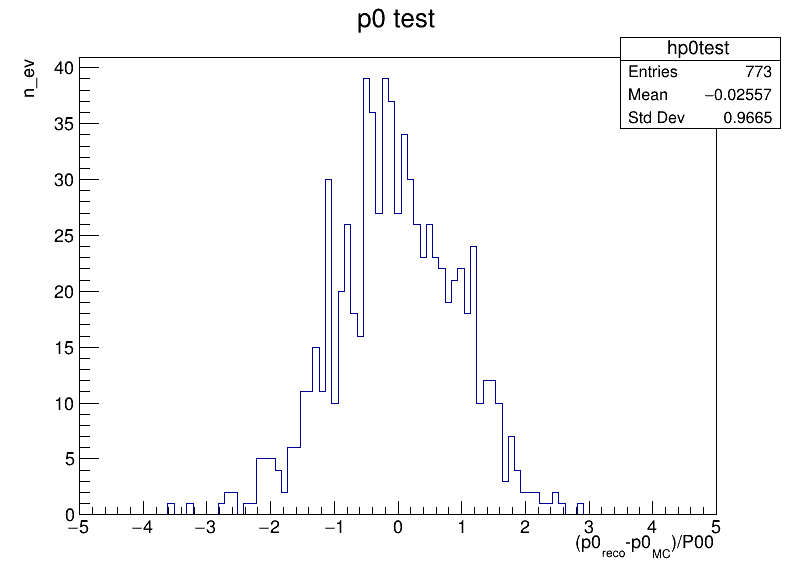

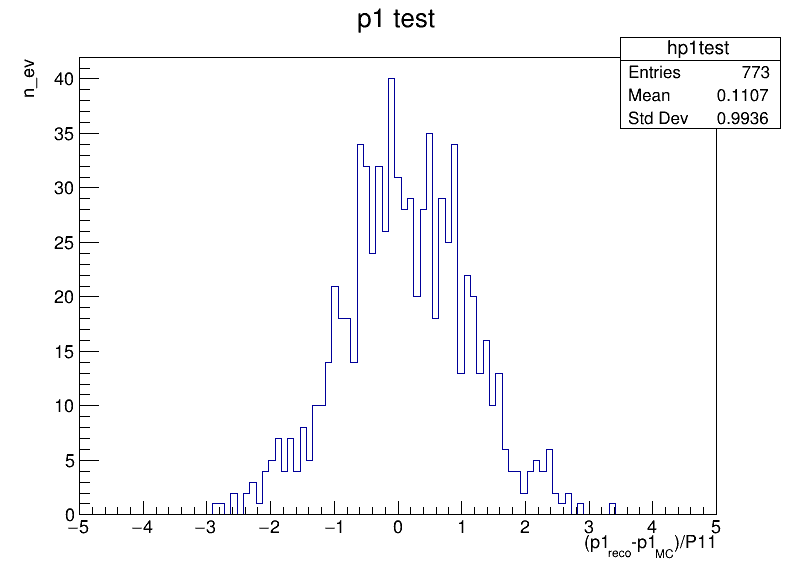

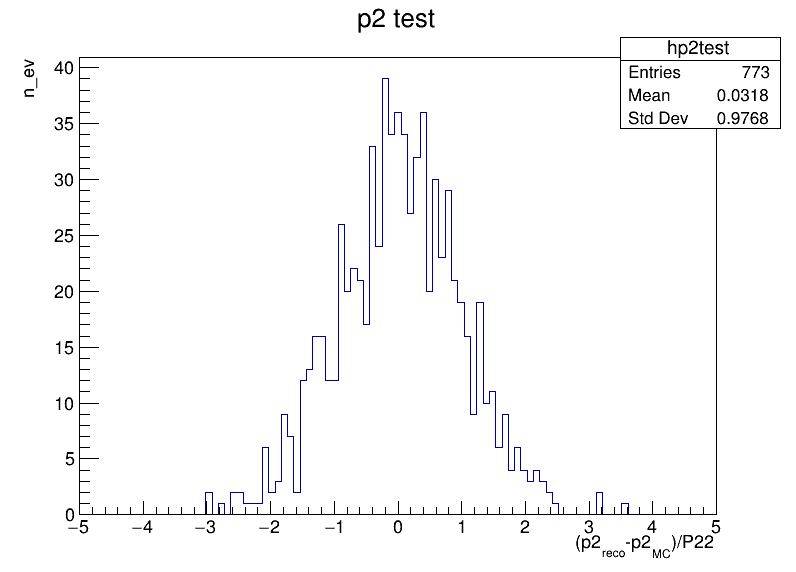

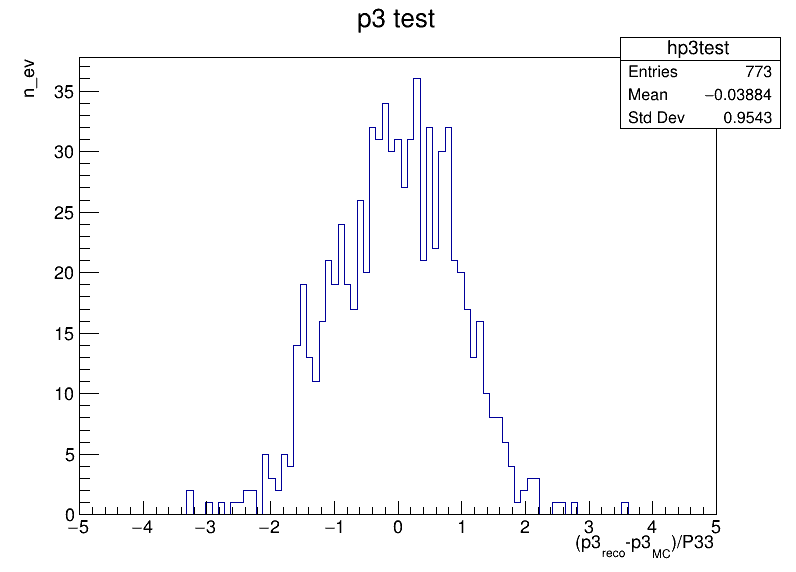

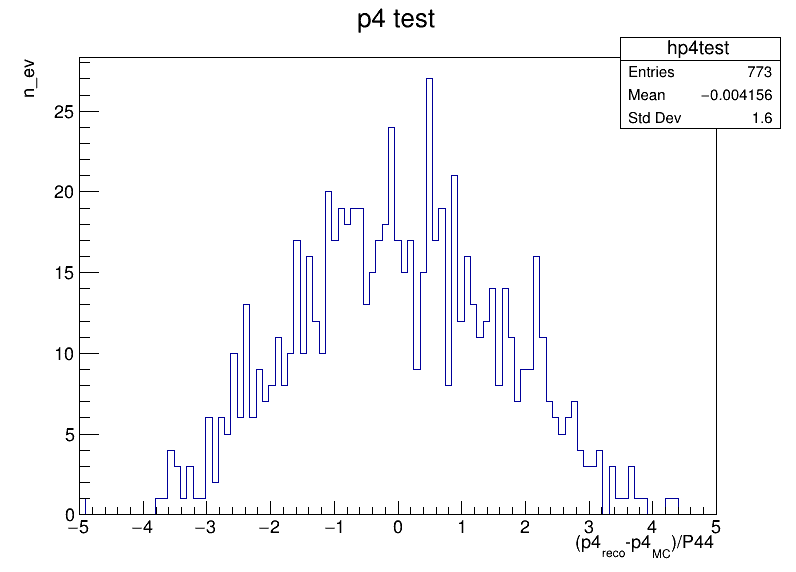

In [10]:
c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
#gPad.SetLogy()
hp0test.SetTitle("p0 test;(p0_{reco}-p0_{MC})/P00;n_ev")
hp0test.Draw()
c0s.Draw()
save=folder+"helix_"+"Residp0"+subfix1+subfix2+subfix3+png
c0s.Print(save)

c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
#gPad.SetLogy()
hp1test.SetTitle("p1 test;(p1_{reco}-p1_{MC})/P11;n_ev")
hp1test.Draw()
c1s.Draw()
save=folder+"helix_"+"Residp1"+subfix1+subfix2+subfix3+png
c1s.Print(save)

c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
#gPad.SetLogy()
hp2test.SetTitle("p2 test;(p2_{reco}-p2_{MC})/P22;n_ev")
hp2test.Draw()
c2s.Draw()
save=folder+"helix_"+"Residp2"+subfix1+subfix2+subfix3+png
c2s.Print(save)

c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
#gPad.SetLogy()
hp3test.SetTitle("p3 test;(p3_{reco}-p3_{MC})/P33;n_ev")
hp3test.Draw()
c3s.Draw()
save=folder+"helix_"+"Residp3"+subfix1+subfix2+subfix3+png
c3s.Print(save)

c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
#gPad.SetLogy()
hp4test.SetTitle("p4 test;(p4_{reco}-p4_{MC})/P44;n_ev")
hp4test.Draw()
c4s.Draw()
save=folder+"helix_"+"Residp4"+subfix1+subfix2+subfix3+png
c4s.Print(save)